# Classificação do MNIST com Rede Neural Convolucional (CNN)

## Descrição:
Este projeto busca implementar os conceitos básicos de CNNs aplicados à classificação de imagens do banco de dados MNIST e utilizando a biblioteca TensorFlow.

### Importação das bibliotecas

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Obtenção dos dados

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Construção do modelo

In [26]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(24, 3, activation=tf.nn.relu),

        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Conv2D(36, 3, activation=tf.nn.relu),

        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    return cnn_model

### Treinamento do modelo

In [29]:
cnn_model = build_cnn_model()

# Configura o modelo
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy'],
    jit_compile=True
)

BATCH_SIZE = 64
EPOCHS = 5

# Treina o modelo com os dados de treino
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

# Avalia a precisão com o os dados de teste
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels, batch_size=BATCH_SIZE)

print('\nTest accuracy:', test_acc)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8725 - loss: 0.4401
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9833 - loss: 0.0559
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9889 - loss: 0.0369
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9915 - loss: 0.0262
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9940 - loss: 0.0199
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9885 - loss: 0.0355

Test accuracy: 0.9908999800682068


In [5]:
predictions = cnn_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


### Verificação das previsões
Escolha um índice arbitrário de imagem e verifique a previsão do modelo!

Predicted label: 4
True label: 4


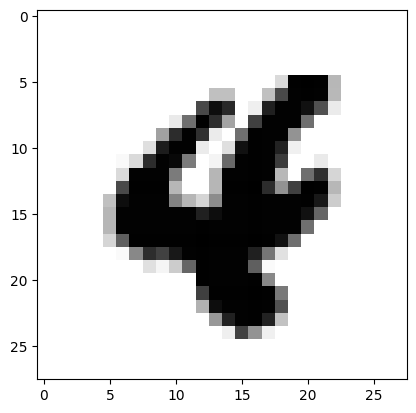

In [36]:
index = 95 # Insira o índice aqui
print("Predicted label:", predictions[index].argmax())
print("True label:", test_labels[index])
plt.imshow(test_images[index,:,:,0], cmap=plt.cm.binary)

# Referências

Baseado no segundo Lab do curso do MIT "Introduction to Deep Learning"


[Repositório do exercício](https://github.com/aamini/introtodeeplearning/tree/master/lab2)

[Documentação do TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras)

© MIT Introduction to Deep Learning
http://introtodeeplearning.com
